# Import 버전들 확인

In [1]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import seaborn as sns
import sklearn
import sys
from sklearn.model_selection import train_test_split, RandomizedSearchCV, cross_validate, RepeatedKFold
from sklearn.svm import SVR
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.preprocessing import StandardScaler
from scipy.stats import norm, randint
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, BatchNormalization
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.wrappers.scikit_learn import KerasRegressor
from sklearn.feature_selection import SelectFromModel
from sklearn.linear_model import Lasso, RidgeCV
from xgboost import XGBRegressor
import xgboost

print('Numpy Version', np.__version__)
print('Pandas Version', pd.__version__)
print('Matplotlib Version', matplotlib.__version__)
print('Scikit-Learn Version', sklearn.__version__)
print('Tensorflow Version', tf.__version__)
print('Python Version', sys.version)

C:\Users\dino3\AppData\Local\Programs\Python\Python311\Lib\site-packages\numpy\_distributor_init.py:30: UserWarning: loaded more than 1 DLL from .libs:
C:\Users\dino3\AppData\Local\Programs\Python\Python311\Lib\site-packages\numpy\.libs\libopenblas.FB5AE2TYXYH2IJRDKGDGQ3XBKLKTF43H.gfortran-win_amd64.dll
C:\Users\dino3\AppData\Local\Programs\Python\Python311\Lib\site-packages\numpy\.libs\libopenblas64__v0.3.21-gcc_10_3_0.dll
  warnings.warn("loaded more than 1 DLL from .libs:"


Numpy Version 1.23.5
Pandas Version 1.5.3
Matplotlib Version 3.6.3
Scikit-Learn Version 1.2.1
Tensorflow Version 2.12.0
Python Version 3.11.1 (tags/v3.11.1:a7a450f, Dec  6 2022, 19:58:39) [MSC v.1934 64 bit (AMD64)]


In [2]:
%matplotlib inline

DATA 읽어오기

In [3]:
raw_data = pd.read_excel('data_new/CERML_origin.xlsx')
print(raw_data)
feature_names = np.array(['Nnum', 'ed', 'Qe', 'Ecohe', 'EN', 'EA', 'I', 'rcov', 'rZ', 'Ne', 'N', 'dMN'])

print(feature_names)

     M      G_Cl  Nnum    ed    Qe  Ecohe    EN    EA     I  rcov    rZ  Ne  \
0   Mn  0.795966     4 -0.83  1.24  -0.36  1.55 -0.50  7.43  1.39  0.23   5   
1   Fe  0.858026     4 -0.62  1.37  -3.15  1.83  0.15  7.90  1.32  0.22   6   
2   Co  1.150586     4 -1.01  0.91  -2.81  1.88  0.66  7.88  1.26  0.21   7   
3   Ni  1.829476     4 -1.17  0.77  -4.69  1.92  1.16  7.64  1.24  0.20   8   
4   Cu  1.902396     4 -1.50  0.71  -2.48  1.90  1.24  7.73  1.32  0.19  10   
..  ..       ...   ...   ...   ...    ...   ...   ...   ...   ...   ...  ..   
70   W -2.478654     0 -0.90  1.73  -4.03  2.36  0.82  7.98  1.62  0.59   4   
71  Os -1.067414     0 -1.17  1.14  -2.09  2.20  1.08  8.71  1.44  0.54   6   
72  Ir -0.004404     0 -0.94  0.60  -1.82  2.20  1.56  8.97  1.41  0.53   7   
73  Pt  1.471646     0 -1.52  0.50  -3.19  2.28  2.13  8.96  1.36  0.51   9   
74  Au  1.570000     0 -3.33  0.50  -1.24  2.54  2.31  9.23  1.36  0.49  10   

     N   dMN  
0   25  2.22  
1   26  2.32  
2   27

# Data preprocessing

In [4]:
print(raw_data)
data_cleaned = raw_data.iloc[:,2:] # input data들만 모은 array
print(data_cleaned)

     M      G_Cl  Nnum    ed    Qe  Ecohe    EN    EA     I  rcov    rZ  Ne  \
0   Mn  0.795966     4 -0.83  1.24  -0.36  1.55 -0.50  7.43  1.39  0.23   5   
1   Fe  0.858026     4 -0.62  1.37  -3.15  1.83  0.15  7.90  1.32  0.22   6   
2   Co  1.150586     4 -1.01  0.91  -2.81  1.88  0.66  7.88  1.26  0.21   7   
3   Ni  1.829476     4 -1.17  0.77  -4.69  1.92  1.16  7.64  1.24  0.20   8   
4   Cu  1.902396     4 -1.50  0.71  -2.48  1.90  1.24  7.73  1.32  0.19  10   
..  ..       ...   ...   ...   ...    ...   ...   ...   ...   ...   ...  ..   
70   W -2.478654     0 -0.90  1.73  -4.03  2.36  0.82  7.98  1.62  0.59   4   
71  Os -1.067414     0 -1.17  1.14  -2.09  2.20  1.08  8.71  1.44  0.54   6   
72  Ir -0.004404     0 -0.94  0.60  -1.82  2.20  1.56  8.97  1.41  0.53   7   
73  Pt  1.471646     0 -1.52  0.50  -3.19  2.28  2.13  8.96  1.36  0.51   9   
74  Au  1.570000     0 -3.33  0.50  -1.24  2.54  2.31  9.23  1.36  0.49  10   

     N   dMN  
0   25  2.22  
1   26  2.32  
2   27

여기서부터 Supervised Learning Part (SVM, Randomforest, NN)

Training set 나누기!

In [5]:
x = data_cleaned.astype(float)
y = raw_data.iloc[:,1].astype(float)

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=42)  # 적당한 비율로 training과 test set을 나누는 부분

# Feature Importance Search

In [6]:
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_scaled = scaler.fit_transform(x)
x_train_scaled_df = pd.DataFrame(x_train, columns=x_train.columns)

### 1. Ridge 기반 Feature importance

In [7]:
model = make_pipeline(StandardScaler(), RidgeCV())

model.fit(x_train, y_train)

print(f'model score on training data: {model.score(x_train, y_train)}')
print(f'model score on testing data: {model.score(x_test, y_test)}')

model score on training data: 0.9251639559765392
model score on testing data: 0.8995196534850398


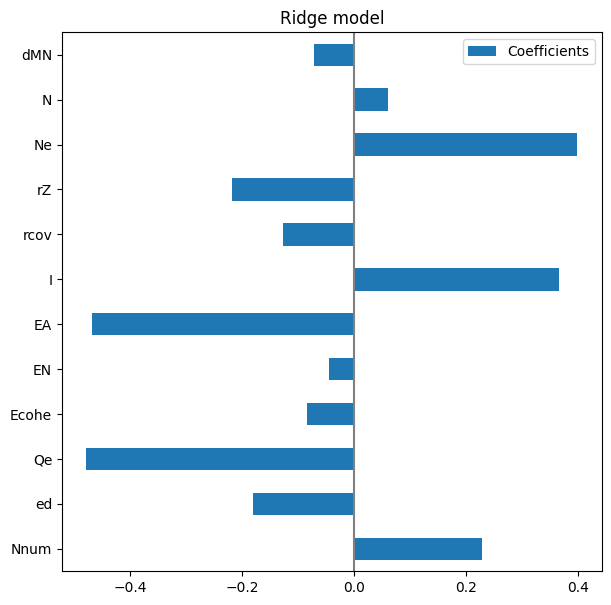

In [8]:
coefs = pd.DataFrame(
   model[1].coef_,
   columns=['Coefficients'], index=x_train.columns
)

coefs.plot(kind='barh', figsize=(9, 7))
plt.title('Ridge model')
plt.axvline(x=0, color='.5')
plt.subplots_adjust(left=.3)

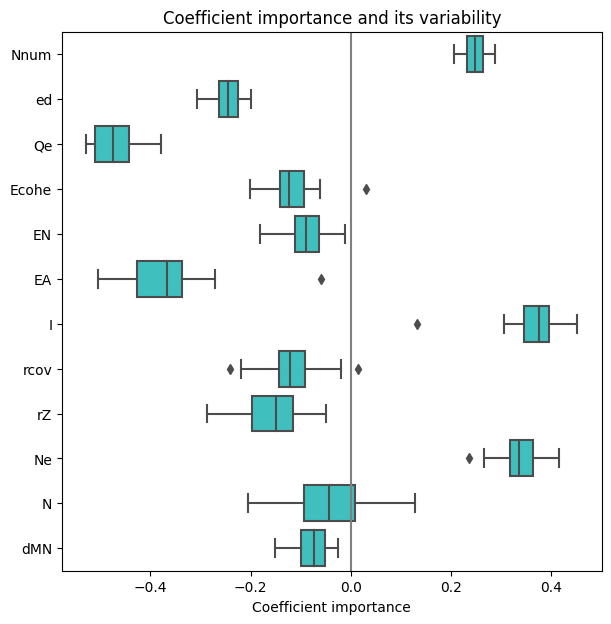

In [9]:
cv_model = cross_validate(
   model, x, y, cv=RepeatedKFold(n_splits=5, n_repeats=5),
   return_estimator=True, n_jobs=2
)
coefs = pd.DataFrame(
   [model[1].coef_
    for model in cv_model['estimator']],
   columns=x.columns
)
plt.figure(figsize=(9, 7))
sns.boxplot(data=coefs, orient='h', color='cyan', saturation=0.5)
plt.axvline(x=0, color='.5')
plt.xlabel('Coefficient importance')
plt.title('Coefficient importance and its variability')
plt.subplots_adjust(left=.3)

### 2. Lasso 기반 Feautre importance

In [10]:
model = make_pipeline(StandardScaler(), Lasso(alpha=.015))

model.fit(x_train, y_train)

print(f'model score on training data: {model.score(x_train, y_train)}')
print(f'model score on testing data: {model.score(x_test, y_test)}')

model score on training data: 0.9205143909169117
model score on testing data: 0.8887134259524362


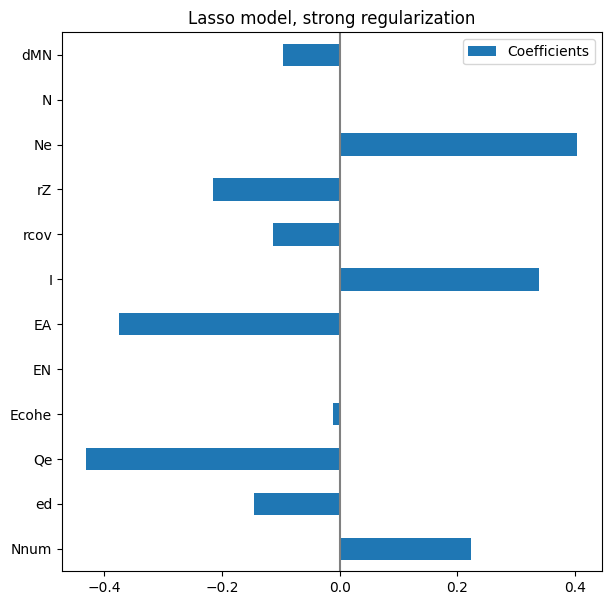

In [11]:
coefs = pd.DataFrame(
   model[1].coef_,
   columns=['Coefficients'], index=x_train.columns
)

coefs.plot(kind='barh', figsize=(9, 7))
plt.title('Lasso model, strong regularization')
plt.axvline(x=0, color='.5')
plt.subplots_adjust(left=.3)

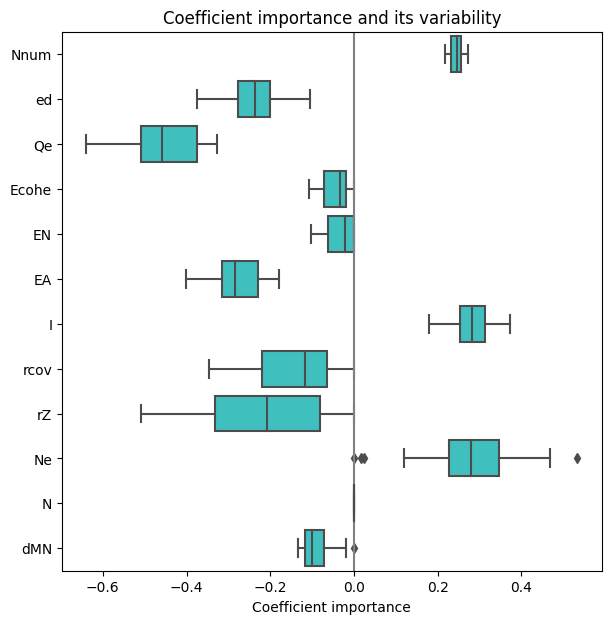

In [12]:
cv_model = cross_validate(
   model, x, y, cv=RepeatedKFold(n_splits=5, n_repeats=5),
   return_estimator=True, n_jobs=2
)
coefs = pd.DataFrame(
   [model[1].coef_
    for model in cv_model['estimator']],
   columns=x.columns
)
plt.figure(figsize=(9, 7))
sns.boxplot(data=coefs, orient='h', color='cyan', saturation=0.5)
plt.axvline(x=0, color='.5')
plt.xlabel('Coefficient importance')
plt.title('Coefficient importance and its variability')
plt.subplots_adjust(left=.3)

### 3. RandomForest 기반 Feature importance

In [19]:
from sklearn.model_selection import RandomizedSearchCV
from pprint import pprint


# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
pprint(random_grid)

{'bootstrap': [True, False],
 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None],
 'max_features': ['auto', 'sqrt'],
 'min_samples_leaf': [1, 2, 4],
 'min_samples_split': [2, 5, 10],
 'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000]}


{'bootstrap': [True, False],
 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, None],
 'max_features': ['auto', 'sqrt'],
 'min_samples_leaf': [1, 2, 4],
 'min_samples_split': [2, 5, 10],
 'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000]}

In [21]:
# Use the random grid to search for best hyperparameters
# First create the base model to tune
rf = RandomForestRegressor()
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)
# Fit the random search model
rf_random.fit(x_train, y_train)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


C:\Users\dino3\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


RandomizedSearchCV(cv=3, estimator=RandomForestRegressor(), n_iter=100,
                   n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [10, 20, 30, 40, 50, 60,
                                                      70, 80, 90, 100, 110,
                                                      None],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [200, 400, 600, 800,
                                                         1000, 1200, 1400, 1600,
                                                         1800, 2000]},
                   random_state=42, verbose=2)

In [32]:
# 최적의 모델 및 파라미터 출력
print("Best Estimator:", rf_random.best_params_)

print('Score on training set:', rf_random.best_estimator_.score(x_train, y_train))
print('Score on test set:', rf_random.best_estimator_.score(x_test, y_test))

model = rf_random.best_estimator_

Best Estimator: {'n_estimators': 1400, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': 'auto', 'max_depth': 100, 'bootstrap': True}
Score on training set: 0.9934215632839646
Score on test set: 0.929589331644763


Text(0.5, 0, 'Feature Importance')

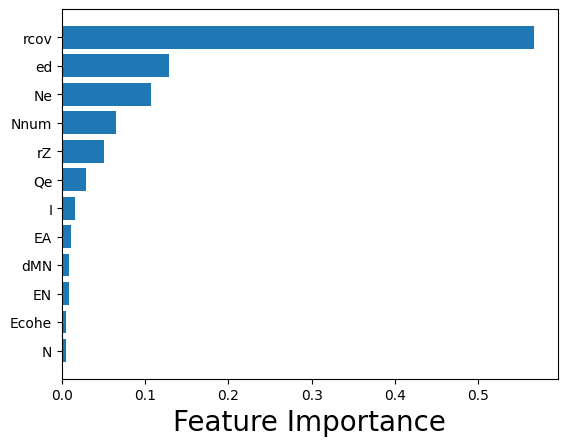

In [33]:
sort = model.feature_importances_.argsort()
plt.barh(feature_names[sort], model.feature_importances_[sort])
plt.xlabel("Feature Importance", fontsize='20')

#### Permutation도 보기

In [34]:
def get_score_after_permutation(model, X, y, curr_feat):
    """ return the score of model when curr_feat is permuted """

    X_permuted = X.copy()
    col_idx = list(X.columns).index(curr_feat)
    # permute one column
    X_permuted.iloc[:, col_idx] = np.random.permutation(
        X_permuted[curr_feat].values)

    permuted_score = model.score(X_permuted, y)
    return permuted_score


def get_feature_importance(model, X, y, curr_feat):
    """ compare the score when curr_feat is permuted """

    baseline_score_train = model.score(X, y)
    permuted_score_train = get_score_after_permutation(model, X, y, curr_feat)

    # feature importance is the difference between the two scores
    feature_importance = baseline_score_train - permuted_score_train
    return feature_importance

def permutation_importance(model, X, y, n_repeats=10):
    """Calculate importance score for each feature."""

    importances = []
    for curr_feat in X.columns:
        list_feature_importance = []
        for n_round in range(n_repeats):
            list_feature_importance.append(
                get_feature_importance(model, X, y, curr_feat))

        importances.append(list_feature_importance)

    return {'importances_mean': np.mean(importances, axis=1),
            'importances_std': np.std(importances, axis=1),
            'importances': importances}

def plot_feature_importances(perm_importance_result, feat_name):
    """ bar plot the feature importance """

    fig, ax = plt.subplots()

    indices = perm_importance_result['importances_mean'].argsort()
    plt.barh(range(len(indices)),
             perm_importance_result['importances_mean'][indices],
             xerr=perm_importance_result['importances_std'][indices])

    ax.set_yticks(range(len(indices)))
    _ = ax.set_yticklabels(feat_name[indices])

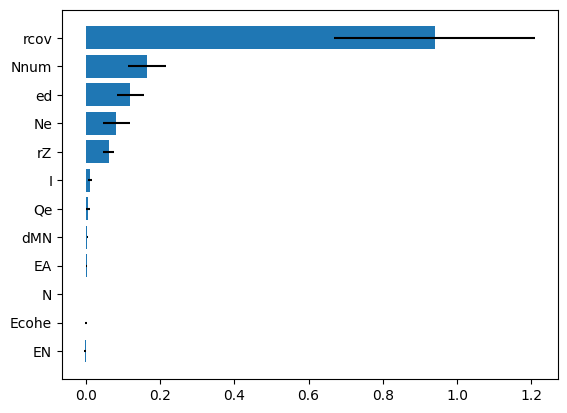

In [35]:
perm_importance_result_train = permutation_importance(model, x_test, y_test, n_repeats=10)

plot_feature_importances(perm_importance_result_train, x_train.columns)

### 5. XGBoost 기반 Feature importance

In [ ]:
xgb = XGBRegressor(n_estimators = 100)
xgb.fit(x, y)
xgb.feature_importances_

In [ ]:
sorted_idx = xgb.feature_importances_.argsort()
plt.barh(feature_names[sorted_idx], xgb.feature_importances_[sorted_idx])
plt.xlabel("Xgboost Feature Importance")

### 6. LightGBM 기반 Feature importance

### 7. SISSO 기반 Feature importance

# 상관계수 분석

In [ ]:
def correlation_heatmap(train):
    correlations = train.corr()

    fig, ax = plt.subplots(figsize=(10,10))
    sns.heatmap(correlations, vmax=1.0, center=0, fmt='.2f', cmap="YlGnBu",
                square=True, linewidths=.5, annot=True, cbar_kws={"shrink": .70}
                )
    plt.show()

In [ ]:
corr = raw_data.iloc[:,1:]
feature_names_corr = np.array(['G_Cl','Nnum', 'ed', 'Qe', 'Ecohe', 'EN', 'EA', 'I', 'rcov', 'rZ', 'Ne', 'N', 'dMN'])

correlation_heatmap(corr[feature_names_corr])

# PCA 분석

#### G_Cl 미포함

In [ ]:
from sklearn.decomposition import PCA

pca = PCA(n_components = 2)
X2D = pca.fit_transform(x_scaled)

In [ ]:
pca.explained_variance_ratio_

In [ ]:
# scatter plot
plt.figure(figsize=(10, 8))
print(X2D[:, 1].shape)
scatter = plt.scatter(X2D[:, 0], X2D[:, 1], c=y, alpha=0.8)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('2D PCA of dataset')

#plt.xlim(-10, 10)   # x축 범위 설정
#plt.ylim(-10, 10)   # y축 범위 설정

# Add a color bar
colorbar = plt.colorbar(scatter)
colorbar.set_label('Target Value')

plt.show()

#### G_Cl 포함

In [ ]:
pca = PCA(n_components = 2)
X2D = pca.fit_transform(corr)

In [ ]:
pca.explained_variance_ratio_

In [ ]:
# scatter plot
plt.figure(figsize=(10, 8))
print(X2D[:, 1].shape)
scatter = plt.scatter(X2D[:, 0], X2D[:, 1], c=y, alpha=0.8)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('2D PCA of dataset')

#plt.xlim(-10, 10)   # x축 범위 설정
#plt.ylim(-10, 10)   # y축 범위 설정

# Add a color bar
colorbar = plt.colorbar(scatter)
colorbar.set_label('Target Value')

plt.show()